# Loan Application Status Prediction

## Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

### Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.	Married - This refers to applicant being in a state of matrimony

4.	Dependents - This refres to persons who depends on the applicants for survival

5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


## Task

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

## Dataset Link

https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [3]:
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# EDA

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
#Checking the dimentions of the dataset

df.shape

(614, 13)

The dataset has 614 rows and 13 columns.

In [6]:
#Checking the columns of the dataset

df.columns.to_list()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [7]:
# Checking the types of columns

df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The dataset has three different types of data - object (Categorical data), float64 and int64 (Numerical data).

In [8]:
# Checking the null values

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The dataset has missing values.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<Axes: >

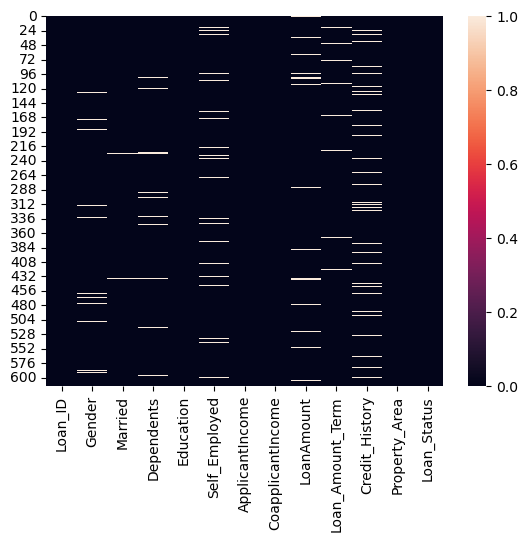

In [10]:
# Using heatmap to visualize the null values.

sns.heatmap(df.isnull())

In [11]:
# Checking for diblicate values

df.duplicated().sum()

0

There is no dublicate values in the dataset.

In [12]:
#Checking for unique values of each column.

for i in df.columns:
    print(df[i].unique())
    print("\n")

['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289' 'LP001

In [13]:
#Checking the number of unique values in each column

df.nunique().to_frame("Number of unique values")

,Number of unique values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


In [14]:
#Checking the value counts of each column.

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253

In [15]:
# Dropping Loan_ID as we have no use of it.

df=df.drop(['Loan_ID'],axis=1)

## Separating categorical and numerical columns.

In [16]:
cat_columns = []

for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        cat_columns.append(i)
print('Categorical Columns: ', cat_columns)
print('\n')


num_columns = []

for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_columns.append(i)
print('Numerical Columns: ', num_columns)

Categorical Columns:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Numerical Columns:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [17]:
# For filling in the missing data in the Numerical columns we gonna calculate the mean

df['LoanAmount']=df['LoanAmount'].fillna((df['LoanAmount'].mean()))
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna((df['Loan_Amount_Term'].mean()))
df['Credit_History']=df['Credit_History'].fillna((df['Credit_History'].mean()))

In [18]:
# Using Simle Imputer to fill in the missing data in the categorical columns

from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy="most_frequent")

df['Gender']=imp.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married']=imp.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents']=imp.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Self_Employed']=imp.fit_transform(df['Self_Employed'].values.reshape(-1,1))

In [19]:
# Checking again for Null values

df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

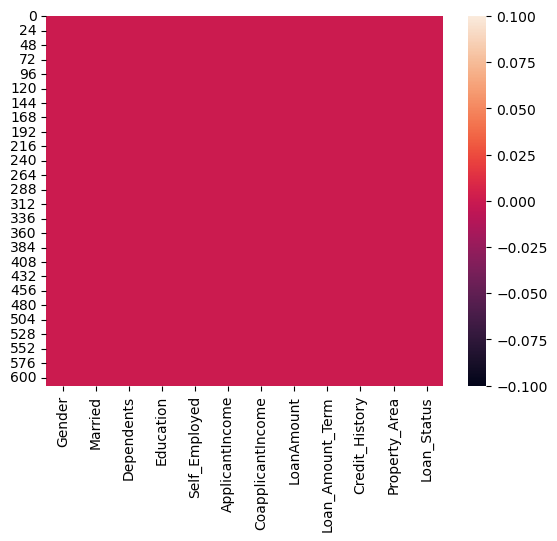

In [20]:
sns.heatmap(df.isnull())

Now we don't have missing data.

## Description of the dataset

In [21]:
# for numerical data

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [22]:
# for object data

df.describe(include="object")

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,502,401,360,480,532,233,422


- In ApplicantIncome and CoapplicantIncome the mean is bigger than the median (50%), which means the data is skewed to the right.
- In LoanAmount the mean is slightly bigger than the median (50%), which means the data is slightly skewed to the right.
- In Loan_Amount_Term and Credit_History the median (50%) is slightly bigger than the mean, which means the data is slightly skewed to the left.
- The Gender column has two values and Male is the top value, frequency 502 times out of 614.
- Married column has also two values and Yes is the top value, frequency 401 times out of 614.
- Education column has 2 values and Graduate is the top one, frequency 480 out of 614.
- Dependent column has four values and the top one is 0 (assuming no dependencies), frequency 360 out of 614.
- Self-Employed column has 2 values and the top one is No, frequency 532 times out of 614.
- Property_Area column has 3 values and Semiurban is the top one, frequency 233 times.
- Loan_Status column has 2 values and Y is the top one, frequency 422 times.

# Data Visualization

## Univariate Analysis

Male      502
Female    112
Name: Gender, dtype: int64


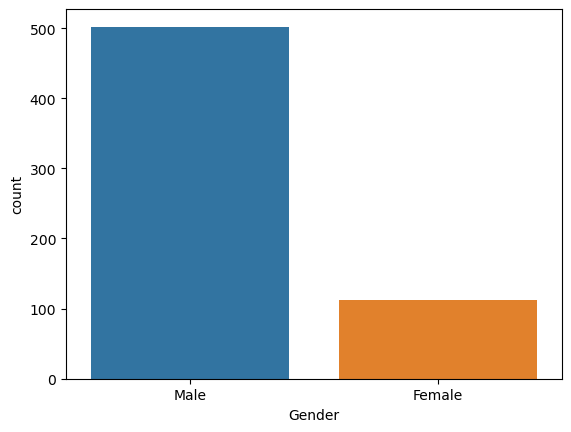

In [23]:
# Visualization the Gender

ax = sns.countplot(x='Gender', data=df)
print(df['Gender'].value_counts())

The majority of the applicants are Male. 502 males have applied and only 112 females.

Yes    401
No     213
Name: Married, dtype: int64


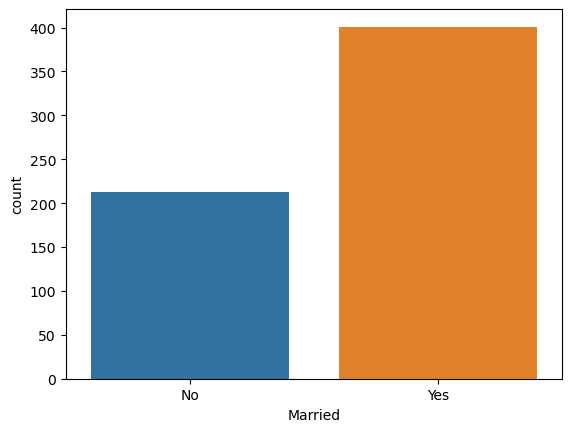

In [24]:
# Visualization the  marital status

ax = sns.countplot(x='Married', data=df)
print(df['Married'].value_counts())

Majority of the applicants are married - 405, those who are not married are 213.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


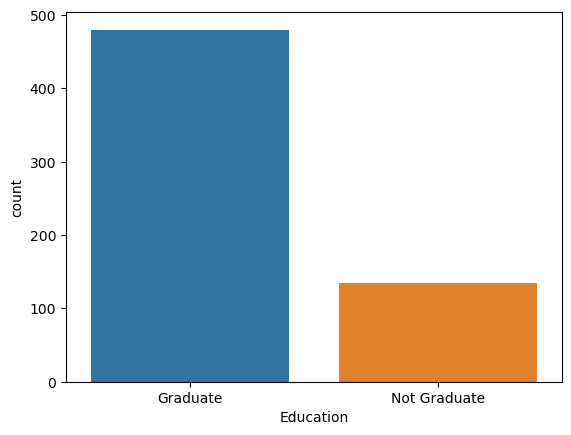

In [25]:
# Visualization the  Education

ax = sns.countplot(x='Education', data=df)
print(df['Education'].value_counts())

Majority of the applicants are Graduate - 480, only 134 are Not Graduate.

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


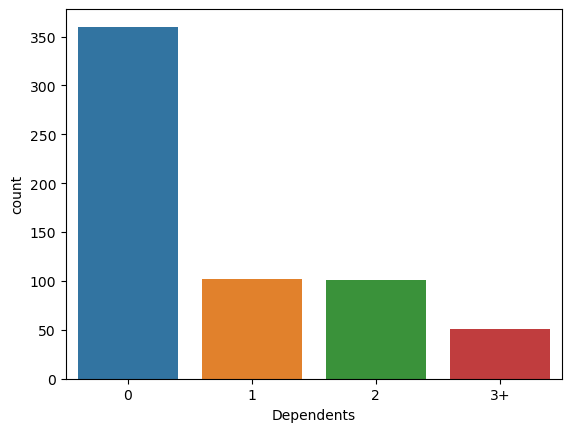

In [26]:
# Visualization the  Dependents

ax = sns.countplot(x='Dependents', data=df)
print(df['Dependents'].value_counts())

Majority of the applicants don't have dependents, those with 1 or 2 dependets are nearly equal count and those with 3+ are only 51.

No     532
Yes     82
Name: Self_Employed, dtype: int64


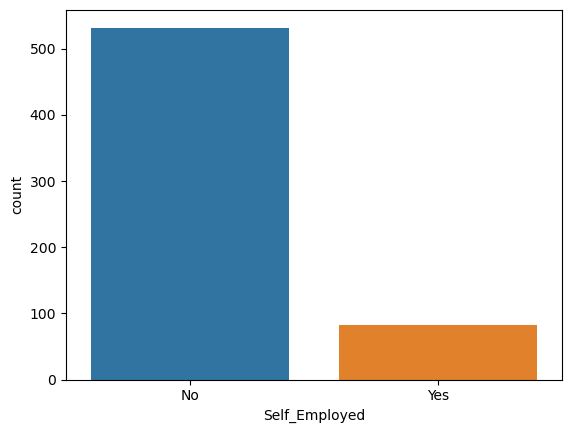

In [27]:
# Visualization the Self_Employed 

ax = sns.countplot(x='Self_Employed', data=df)
print(df['Self_Employed'].value_counts())

Majority of the applicants are NOT Self-employed - 532, only 82 of them are Self-employed.

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


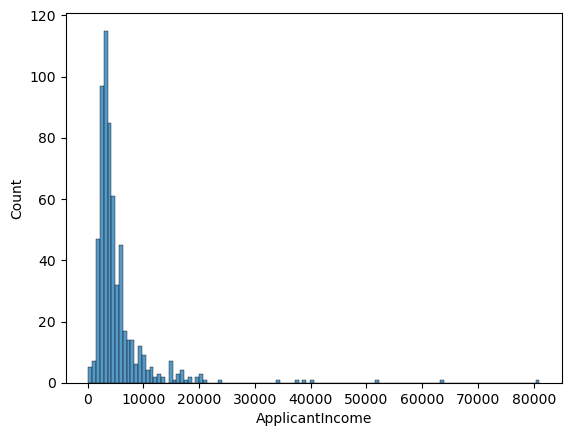

In [30]:
# Visualization the Applicant Income 

sns.histplot(x='ApplicantIncome', data=df)
print(df['ApplicantIncome'].value_counts())

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


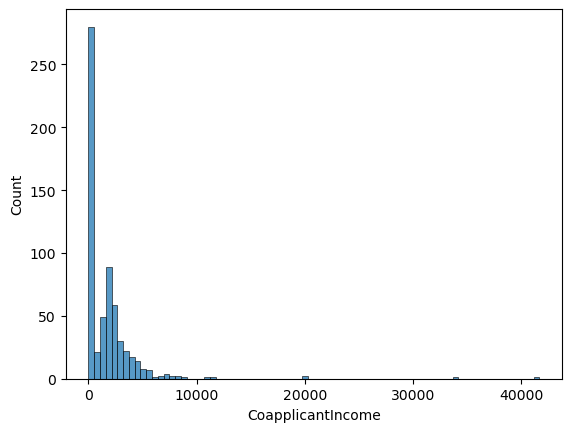

In [31]:
# Visualization the CoapplicantIncome 

sns.histplot(x='CoapplicantIncome', data=df)
print(df['CoapplicantIncome'].value_counts())

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


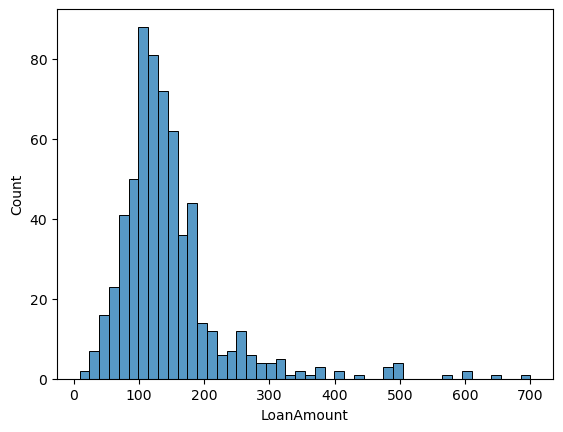

In [32]:
# Visualization the Loan Amount 

sns.histplot(x='LoanAmount', data=df)
print(df['LoanAmount'].value_counts())

Most of the applicant applied for a Loan between 80.0000-180.0000.

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


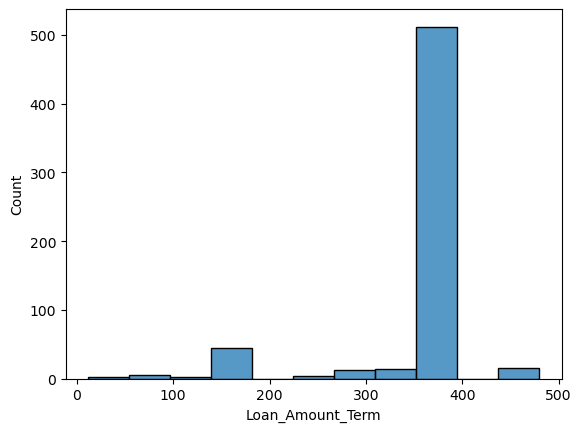

In [33]:
# Visualization the Loan Amount Term 

sns.histplot(x='Loan_Amount_Term', data=df)
print(df['Loan_Amount_Term'].value_counts())

Majority of the Loan Amount Term applied is for 360.0.

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64


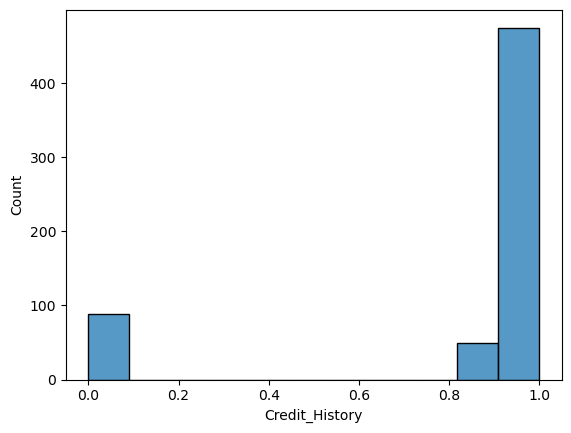

In [34]:
# Visualization the Credit History 

sns.histplot(x='Credit_History', data=df)
print(df['Credit_History'].value_counts())

Majority of the applicants are with Credit History 1.0000

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


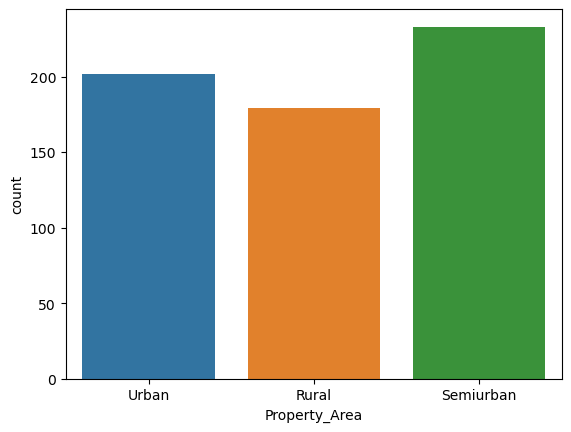

In [35]:
# Visualization the Property_Area 

ax = sns.countplot(x='Property_Area', data=df)
print(df['Property_Area'].value_counts())

Semiurban is the most common area, later Urban and Rural. 

Y    422
N    192
Name: Loan_Status, dtype: int64


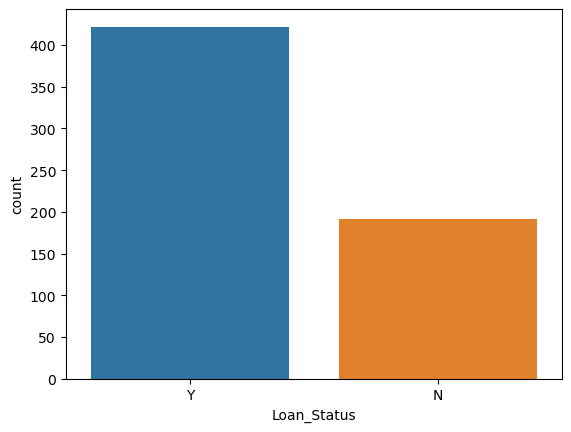

In [36]:
# Visualization the Loan_Status 

ax = sns.countplot(x='Loan_Status', data=df)
print(df['Loan_Status'].value_counts())

The majority of the applivations have been accepted - 422, only 192 haven't been successful.

## Bivariate Analysis

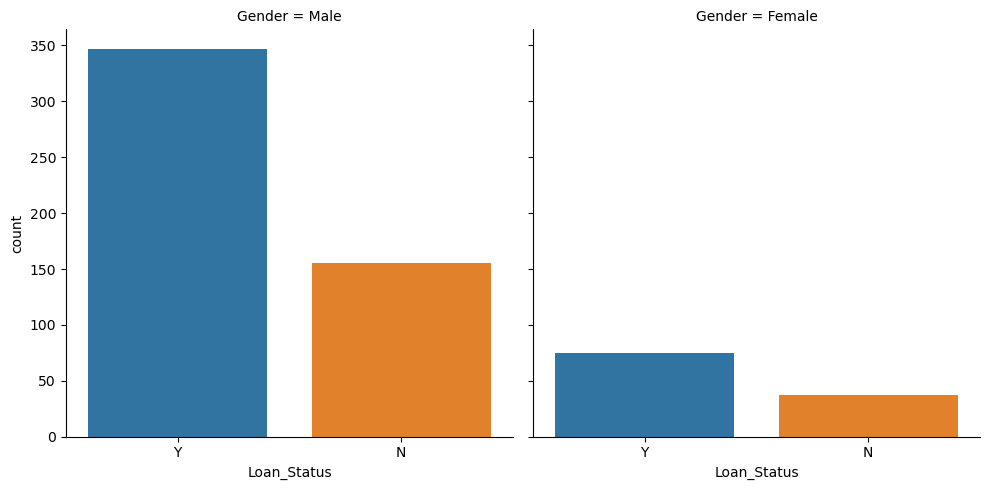

In [38]:
# Comparing Loan status on the basis of Gender

sns.catplot(x='Loan_Status',col='Gender',data=df,kind='count')

On the basis of Gender, it's clear that most of the applicants are Male, the majority of their application have been approved. The majority of Female applications have been approved as well.

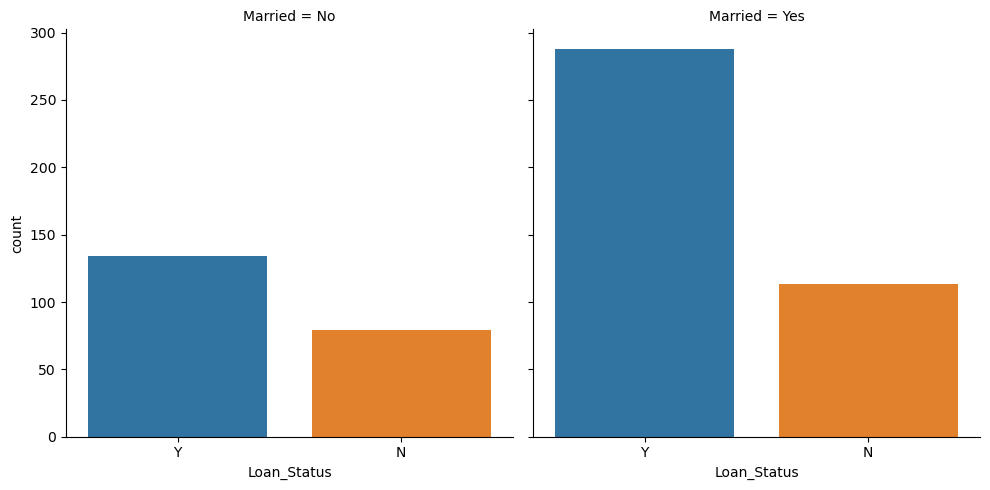

In [39]:
# Comparing Loan status on the basis of Marital Status

sns.catplot(x='Loan_Status',col='Married',data=df,kind='count')

The amount of successful applications of applicant who are married is higher compared to those who are not married.

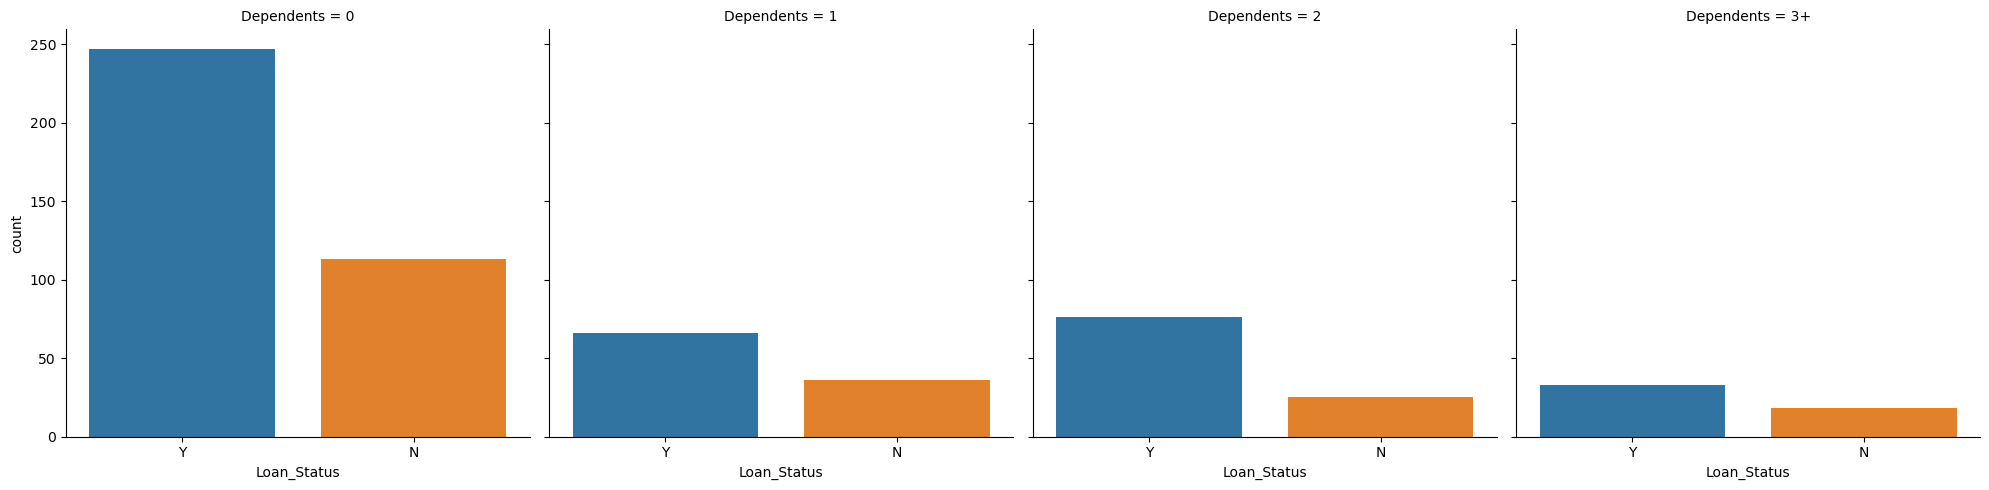

In [40]:
# Comparing Loan status on the basis of Dependents

sns.catplot(x='Loan_Status',col='Dependents',data=df,kind='count')

The amount of successful applications of applicant who have 0 dependents is higher compared to those who have 1,2 or 3+.

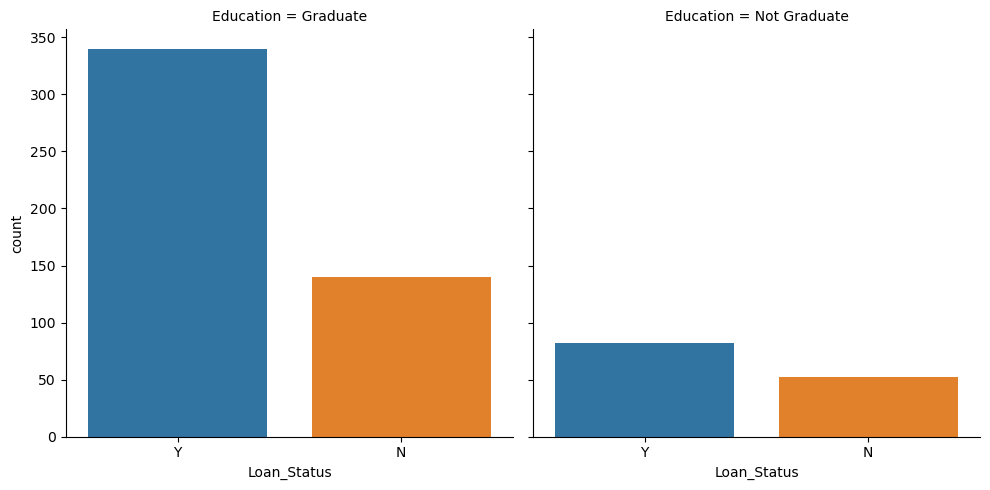

In [37]:
# Comparing Loan status on the basis of Education

sns.catplot(x='Loan_Status',col='Education',data=df,kind='count')

On the basis of Education, applicants who are Graduated have higher chance of being Approved for Loan. 

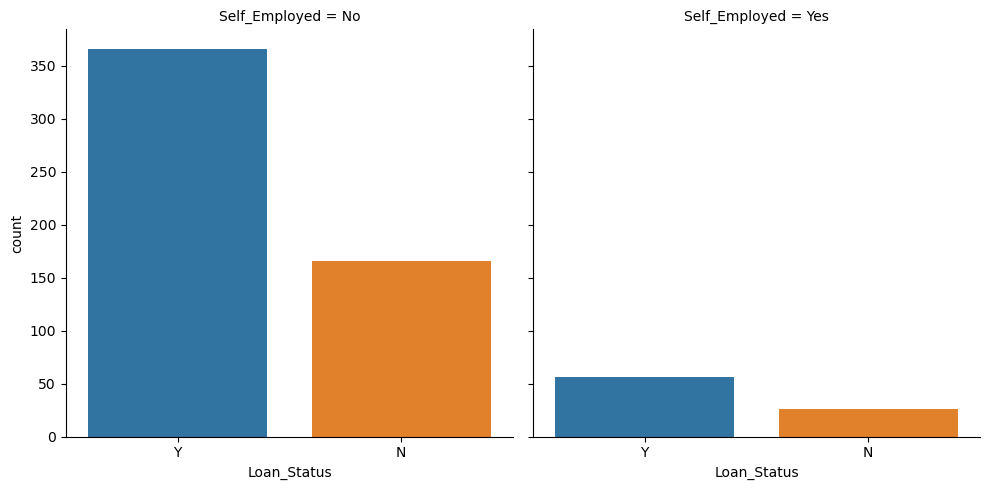

In [41]:
# Comparing Loan status on the basis of Self-Employment

sns.catplot(x='Loan_Status',col='Self_Employed',data=df,kind='count')

On the basis of Self-Emplloyment, applicants who are NOT Self-Employed have higher chance of being Approved for Loan.

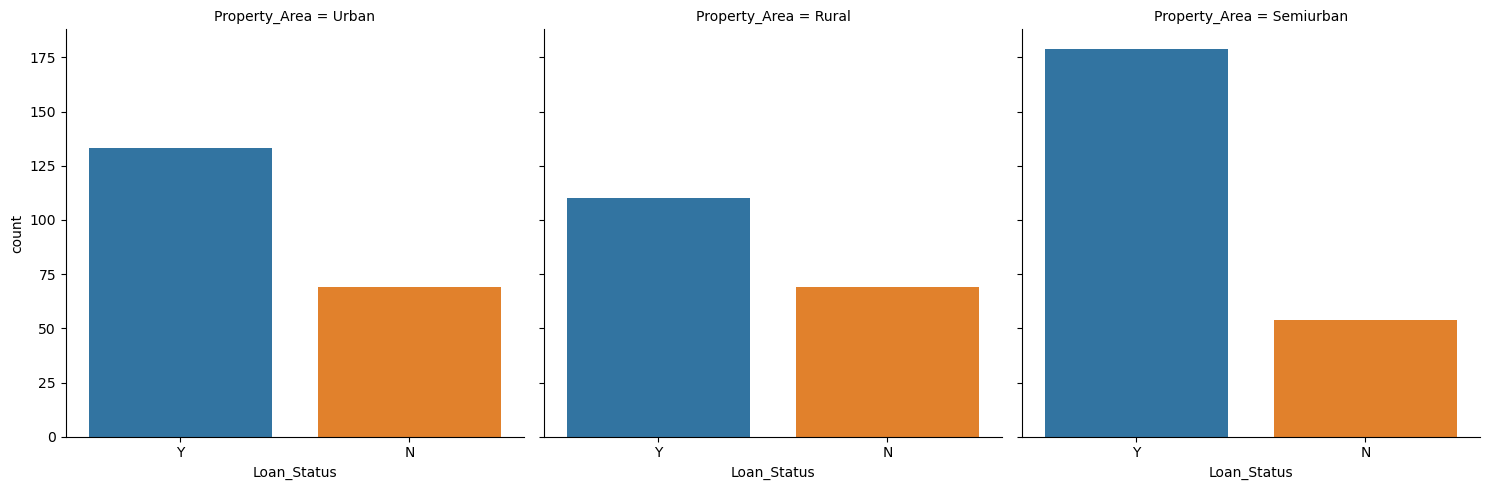

In [44]:
# Comparing Loan status on the basis of Property Area

sns.catplot(x='Loan_Status',col='Property_Area',data=df,kind='count')

Applicants from Semiurban areas have the highest chance of approval.

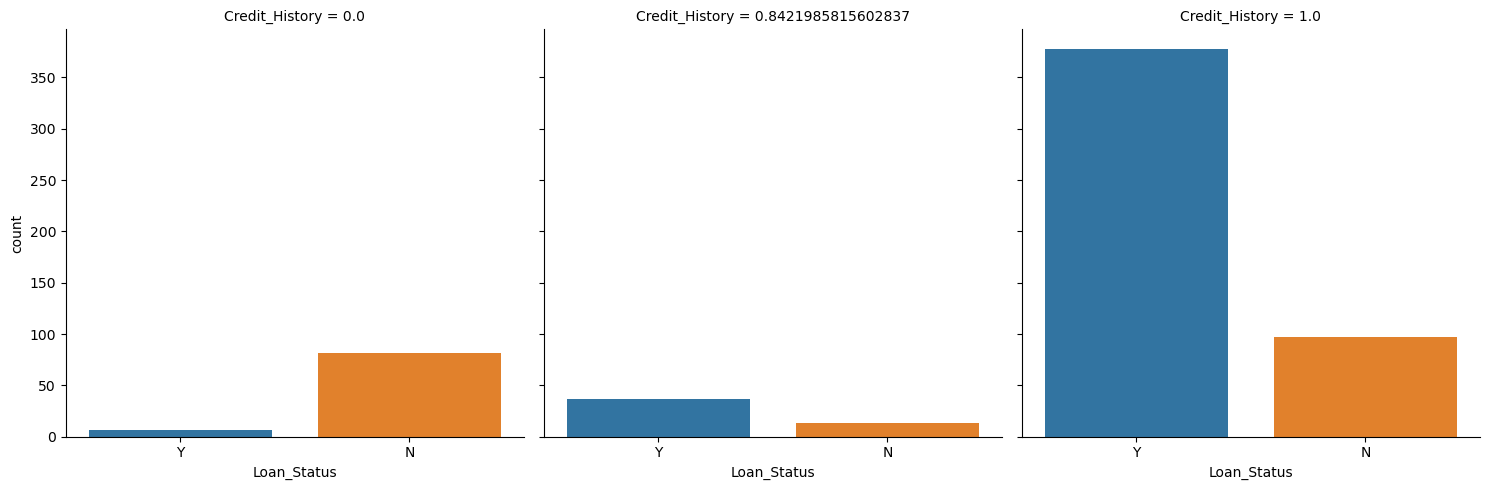

In [45]:
# Comparing Loan status on the basis of Credit History

sns.catplot(x='Loan_Status',col='Credit_History',data=df,kind='count')

Applicants with high Credit History score have the highest chance of approval.

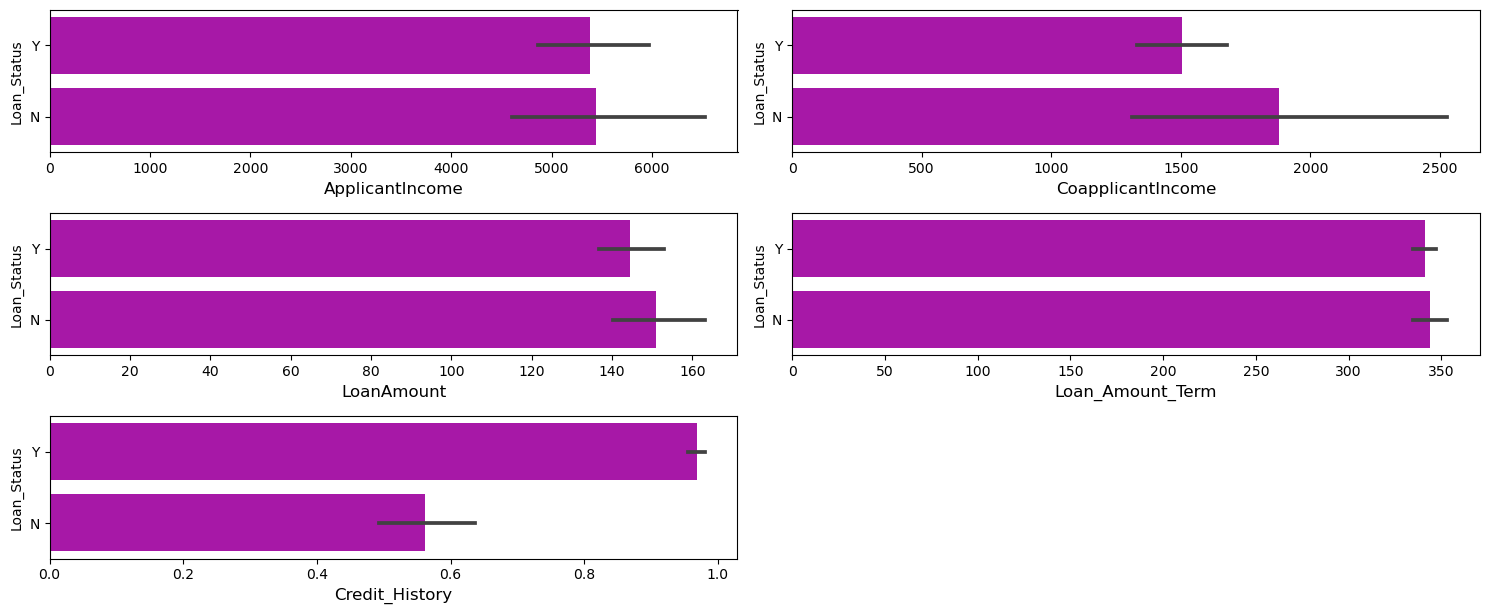

In [54]:
#Visiualizing the numerical columns vs Loan_Status

plt.figure(figsize=(15,20), facecolor='white')
plotnumber=1
for col in num_columns:
    if plotnumber<=20:
        ax=plt.subplot(10,2,plotnumber) 
        sns.barplot(x=col, y='Loan_Status', data=df, color='m')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

## Multivariate Analysis

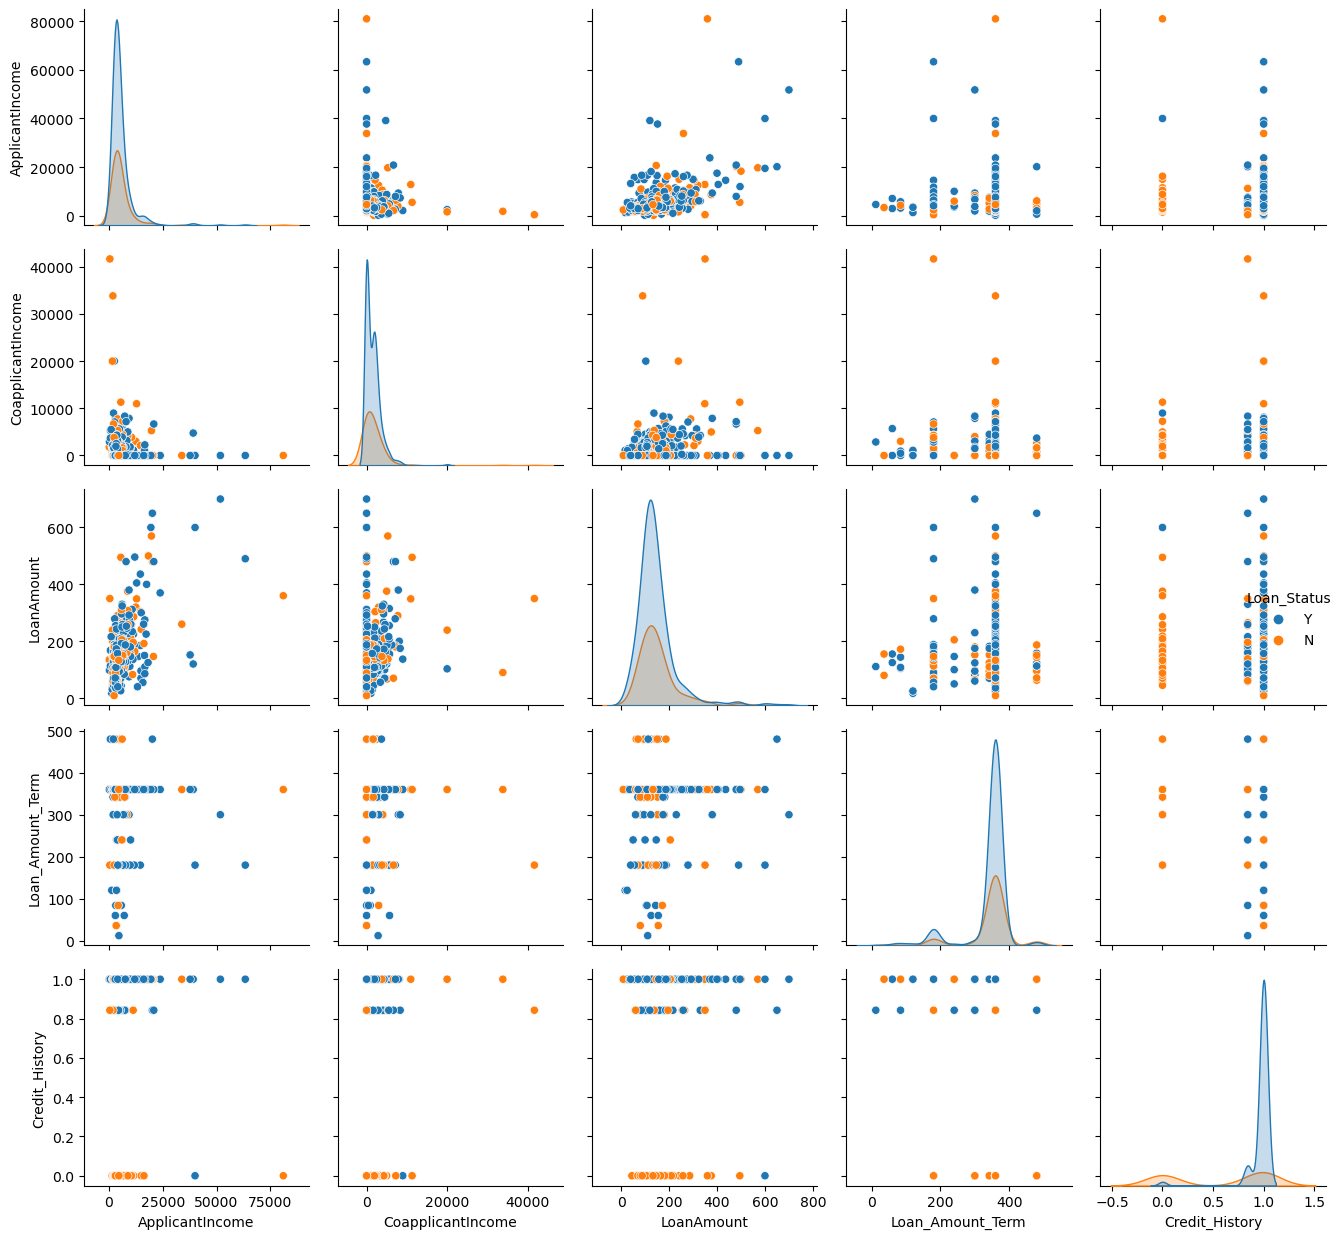

In [56]:
sns.pairplot(df, hue='Loan_Status')
plt.tight_layout()

## Checking for outliers

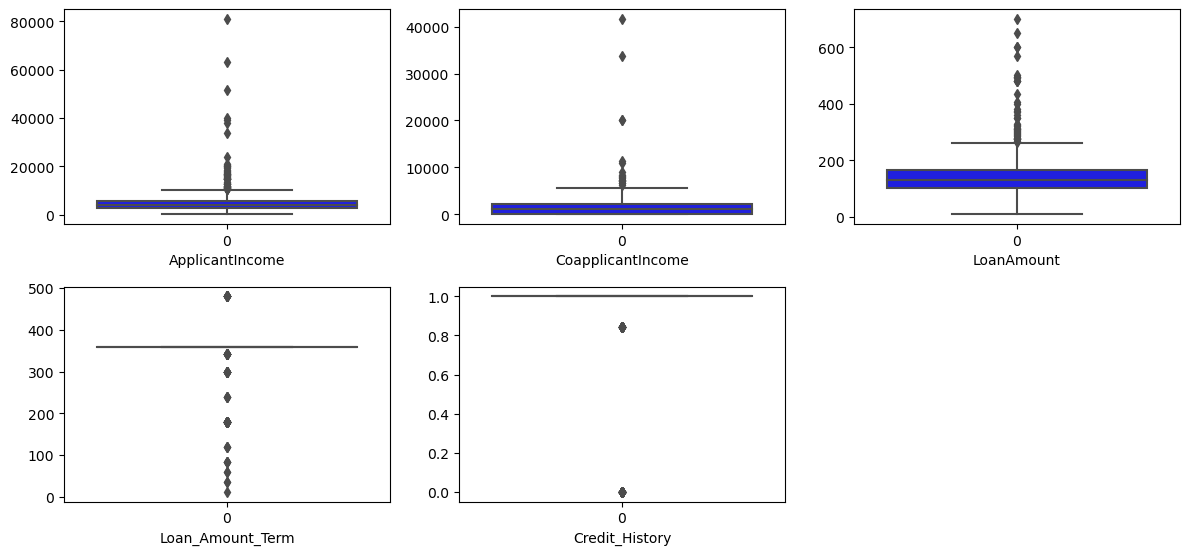

In [58]:
# Checking for outliers only for numerical columns

plt.figure(figsize=(12,8))
pnum=1
for i in num_columns:
    if pnum<=10:
        plt.subplot(3,3,pnum)
        sns.boxplot(df[i],color='b')
        plt.xlabel(i)
    pnum+=1
    
plt.tight_layout()
plt.show()

Outliers are detected in 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'

## Removing the outliers

In [59]:
from scipy.stats import zscore

outliers=df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
z=np.abs(zscore(outliers))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,0.554487,0.000000,0.279851,0.451640
1,0.134412,0.038732,0.219273,0.279851,0.451640
2,0.393747,0.554487,0.957641,0.279851,0.451640
3,0.462062,0.251980,0.314547,0.279851,0.451640
4,0.097728,0.554487,0.064454,0.279851,0.451640
...,...,...,...,...,...
609,0.410130,0.554487,0.898095,0.279851,0.451640
610,0.212557,0.554487,1.267279,2.518655,0.451640
611,0.437174,0.472404,1.269371,0.279851,0.451640
612,0.357064,0.554487,0.483367,0.279851,0.451640


In [60]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
       2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
      dtype=int64))


In [61]:
df_new=df[(z<3).all(axis=1)]  
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


37 rows have beem removed as an ouliers.

In [62]:
# Checking the data loss percentage after removing the outliers

print("Data Loss Percentage:", ((df.shape[0]-df_new.shape[0])/df.shape[0])*100)  

Data Loss Percentage: 6.026058631921824


In [63]:
df=df_new

## Checking for skewness

In [65]:
df.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
dtype: float64

The features 'ApplicantIncome', 'CoapplicantIncome' and 'LoanAmount' have possitive skewness.

The features 'Loan_Amount_Term' and 'Credit_History' have negative skewness.

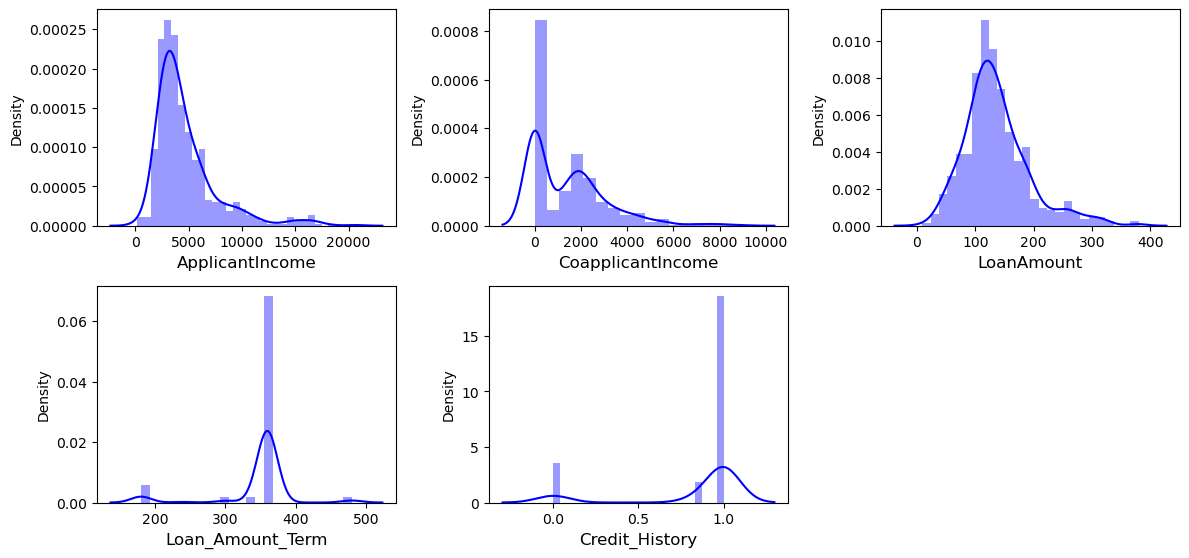

In [67]:
plt.figure(figsize=(12,8), facecolor='white')

plotnumber=1

for i in num_columns:   
    if plotnumber<=10:
        plt.subplot(3,3,plotnumber)
        sns.distplot(df[i],color='b')
        plt.xlabel(i,fontsize=12)
    plotnumber+=1

plt.tight_layout()
plt.show()

## Removing of skewness

In [68]:
df['ApplicantIncome'] = df['ApplicantIncome'].apply(lambda x: np.cbrt(x))
df['CoapplicantIncome'] = df['CoapplicantIncome'].apply(lambda x: np.cbrt(x))
df['LoanAmount'] = df['LoanAmount'].apply(lambda x: np.cbrt(x))
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].apply(lambda x: np.cbrt(x))
df['Credit_History'] = df['Credit_History'].apply(lambda x: np.cbrt(x))

In [69]:
df.skew()

ApplicantIncome      0.845845
CoapplicantIncome   -0.038951
LoanAmount           0.017152
Loan_Amount_Term    -2.557136
Credit_History      -1.968907
dtype: float64

In [71]:
import scipy.stats as stats
from scipy.stats import boxcox
import math

df['Loan_Amount_Term'],lambda_=stats.yeojohnson(df['Loan_Amount_Term'])
df['Credit_History'],lambda_=stats.yeojohnson(df['Credit_History'])

In [72]:
df.skew()

ApplicantIncome      0.845845
CoapplicantIncome   -0.038951
LoanAmount           0.017152
Loan_Amount_Term     0.717390
Credit_History      -1.865789
dtype: float64

## Encoding categorical data

In [74]:
# Encoding the categorical data into numerical using Label Encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [75]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,18.017473,0.000000,5.270588,1.502081e+08,67.876864,2,1
1,1,1,1,0,0,16.610522,11.467457,5.039684,1.502081e+08,67.876864,0,0
2,1,1,0,0,1,14.422496,0.000000,4.041240,1.502081e+08,67.876864,2,1
3,1,1,0,1,0,13.720654,13.310098,4.932424,1.502081e+08,67.876864,2,1
4,1,0,0,0,0,18.171206,0.000000,5.204828,1.502081e+08,67.876864,2,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             577 non-null    int32  
 1   Married            577 non-null    int32  
 2   Dependents         577 non-null    int32  
 3   Education          577 non-null    int32  
 4   Self_Employed      577 non-null    int32  
 5   ApplicantIncome    577 non-null    float64
 6   CoapplicantIncome  577 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   577 non-null    float64
 9   Credit_History     577 non-null    float64
 10  Property_Area      577 non-null    int32  
 11  Loan_Status        577 non-null    int32  
dtypes: float64(5), int32(7)
memory usage: 42.8 KB


Now we have only numerical data.

## Statistical summary

In [77]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02,577.000000,577.000000,577.000000
mean,0.814558,0.649913,0.719237,0.227036,0.126516,16.134910,7.419133,5.048632,1.433427e+08,56.535793,1.031196,0.689775
std,0.388993,0.477411,0.995229,0.419280,0.332719,3.025241,6.790619,0.697692,4.820556e+07,24.047838,0.789953,0.462987
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.313293,0.000000,2.080084,2.003326e+07,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,14.149753,0.000000,4.641589,1.502081e+08,67.876864,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,15.536163,10.786517,5.039684,1.502081e+08,67.876864,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,17.685909,13.109528,5.428835,1.502081e+08,67.876864,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,27.442635,20.785419,7.243156,3.527897e+08,67.876864,2.000000,1.000000


## Checking the correlation between the target variable and the independent variables.

In [78]:
cor=df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.049555,0.230714,0.173387,-0.097647,0.018074,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.018391,0.320626,0.182267,-0.128210,0.010515,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.100853,-0.006521,0.131665,-0.074350,-0.015441,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.178728,0.030281,-0.125819,-0.067934,-0.083198,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.230846,-0.078584,0.117411,-0.052299,-0.014128,-0.028253,-0.026525
ApplicantIncome,0.049555,-0.018391,0.100853,-0.178728,0.230846,1.000000,-0.343626,0.441357,-0.082473,0.043031,-0.012177,-0.004722
CoapplicantIncome,0.230714,0.320626,-0.006521,0.030281,-0.078584,-0.343626,1.000000,0.228319,-0.016041,-0.006753,-0.081866,0.071908
LoanAmount,0.173387,0.182267,0.131665,-0.125819,0.117411,0.441357,0.228319,1.000000,0.022384,-0.008390,-0.094665,-0.028730
Loan_Amount_Term,-0.097647,-0.128210,-0.074350,-0.067934,-0.052299,-0.082473,-0.016041,0.022384,1.000000,0.008151,-0.032720,-0.053462
Credit_History,0.018074,0.010515,-0.015441,-0.083198,-0.014128,0.043031,-0.006753,-0.008390,0.008151,1.000000,-0.010461,0.559553


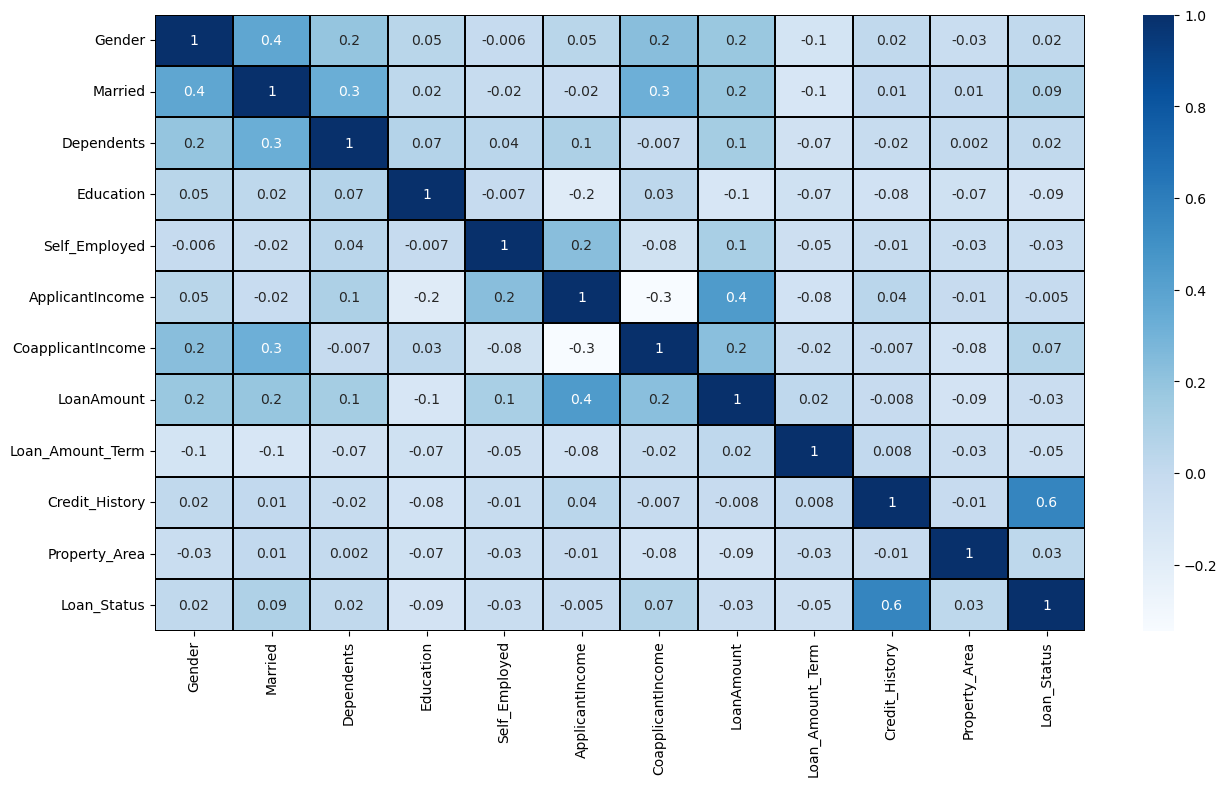

In [79]:
# Vusualizing the correlation

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), linewidths=0.1,fmt='.1g',linecolor='black', annot = True, cmap = 'Blues')
plt.yticks(rotation=0);
plt.show()

- There is moderate possitive correlation between 'Credit_history' and 'Loan_status', that means the successful Loan application depends on high Credit History.

- There is moderate possitive correlation between 'Gender' and 'Married', that suggest marridge is more common for specific gender.

- There is moderate possitive correlation between 'Dependents' and 'Married', that suggest married applicants tend to have dependents.

- There is possitive correlation between 'CoapplicantIncome' and 'Married', that suggest the Coapplicands tend to be Married.

- There is moderate possitive correlation between 'Loan_Amount' and 'ApplicantIncome', which suggest that the Loan Amount depends from the Applicant Income.

- There is possitive correlation between 'Loan_Amount' and 'CoapplicantIncome', which suggest that the Loan Amount depends from the Applicant Income.

- There is possitive correlation between 'Loan_Amount' and 'Gender', that suggests specific gender is more likely to get higher loan amount.

- There is possitive correlation between 'Loan_Amount' and 'Married', that suggests married applicants is more likely to get higher loan amount.

In [80]:
cor=cor['Loan_Status'].sort_values(ascending=False)
cor

Loan_Status          1.000000
Credit_History       0.559553
Married              0.089026
CoapplicantIncome    0.071908
Property_Area        0.026507
Dependents           0.017872
Gender               0.017408
ApplicantIncome     -0.004722
Self_Employed       -0.026525
LoanAmount          -0.028730
Loan_Amount_Term    -0.053462
Education           -0.092658
Name: Loan_Status, dtype: float64

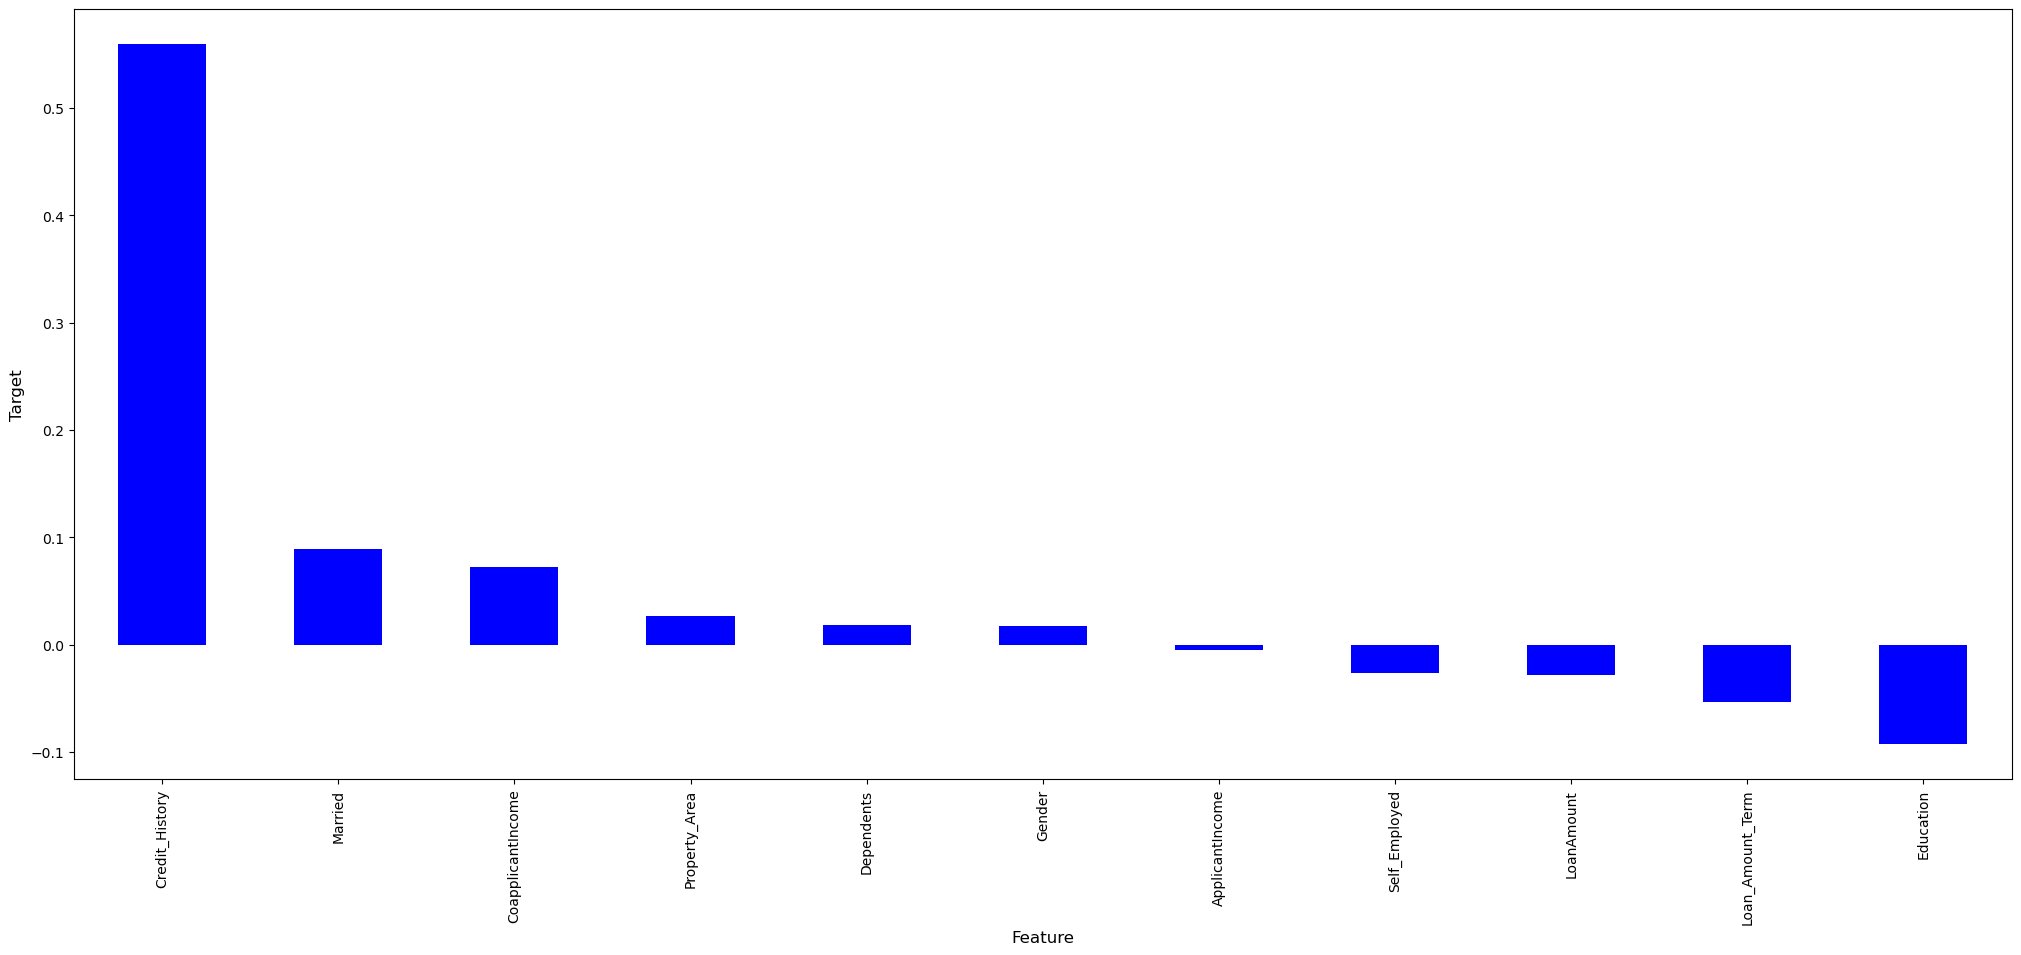

In [81]:
plt.figure(figsize=(25,10))

df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='b')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Target', fontsize=12)
plt.show()

The target value (Loan_Status) has two outcomes that means we have binary classification problem.

# Classification

## Separating features and label

In [82]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

## Feature Scaling using Standard Scalarization

In [83]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.622825,-1.093504,0.318405,0.142544,0.472014,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.157351,0.596681,-0.012836,0.142544,0.472014,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.566533,-1.093504,-1.445145,0.142544,0.472014,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.798730,0.868268,-0.166705,0.142544,0.472014,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.673686,-1.093504,0.224069,0.142544,0.472014,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.620151,-1.093504,-1.302297,0.142544,0.472014,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,-0.040329,-1.093504,-2.336409,-2.560211,0.472014,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.298514,-0.177556,1.830577,0.142544,0.472014,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.161699,-1.093504,0.960923,0.142544,0.472014,1.227472


## Checking Variance Inflation Factor VIF

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features']=x.columns

vif

,VIF values,Features
0,1.218293,Gender
1,1.403363,Married
2,1.169641,Dependents
3,1.068890,Education
4,1.061788,Self_Employed
5,1.804271,ApplicantIncome
6,1.599887,CoapplicantIncome
7,1.611909,LoanAmount
8,1.048292,Loan_Amount_Term
9,1.011353,Credit_History


By checking the VIF values we can find the features causing multicollineraty problem.

The VIF is very low. That means there is no Multicollineraty between the other features.

## Oversampling

In [85]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

The target variable has imbalanced data.

In [87]:
# Balancing the Imbalance data using oversampling method SMOTE

from imblearn.over_sampling import SMOTE

SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [88]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

The imbalance issue has been resolved.

# Machine Learning

In [89]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [90]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"at random_state",maxRS)

Best accuracy is 0.8786610878661087 at random_state 12


In [91]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.622825,-1.093504,0.318405,0.142544,0.472014,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.157351,0.596681,-0.012836,0.142544,0.472014,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.566533,-1.093504,-1.445145,0.142544,0.472014,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.798730,0.868268,-0.166705,0.142544,0.472014,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.673686,-1.093504,0.224069,0.142544,0.472014,1.227472


In [92]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=maxRS)

In [94]:
x_train.shape

(557, 11)

In [95]:
y_train.shape

(557,)

In [96]:
x_test.shape

(239, 11)

In [97]:
y_test.shape

(239,)

## Random Forest Classifier

In [108]:
rfc=RandomForestClassifier(n_estimators=200, random_state=12)

In [109]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=12)

In [110]:
rfcpred= rfc.predict(x_test)
rfcpred

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [111]:
print(classification_report(y_test,rfcpred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85       109
           1       0.85      0.94      0.89       130

    accuracy                           0.87       239
   macro avg       0.88      0.87      0.87       239
weighted avg       0.88      0.87      0.87       239



In [113]:
print('Accuracy Score of RFC: ', accuracy_score(y_test, rfcpred)*100)

Accuracy Score of RFC:  87.44769874476988


## GaussianNB

In [114]:
gnb=GaussianNB()

In [115]:
gnb.fit(x_train,y_train)

GaussianNB()

In [119]:
gnbpred= gnb.predict(x_test)

In [120]:
print(classification_report(y_test,gnbpred))

              precision    recall  f1-score   support

           0       0.93      0.46      0.61       109
           1       0.68      0.97      0.80       130

    accuracy                           0.74       239
   macro avg       0.80      0.71      0.71       239
weighted avg       0.79      0.74      0.71       239



In [122]:
print('Accuracy Score of GaussianNB: ', accuracy_score(y_test, gnbpred)*100)

Accuracy Score of GaussianNB:  73.64016736401673


## KNN

In [123]:
knn=KNeighborsClassifier(n_neighbors=13)

In [124]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [125]:
knnpred=knn.predict(x_test)

In [126]:
print(classification_report(y_test,knnpred))

              precision    recall  f1-score   support

           0       0.75      0.56      0.64       109
           1       0.70      0.85      0.76       130

    accuracy                           0.72       239
   macro avg       0.72      0.70      0.70       239
weighted avg       0.72      0.72      0.71       239



In [127]:
print('Accuracy Score of KNN: ', accuracy_score(y_test, knnpred)*100)

Accuracy Score of KNN:  71.54811715481172


## Logistic regression

In [128]:
LR=LogisticRegression()

In [129]:
LR.fit(x_train,y_train)

LogisticRegression()

In [130]:
LRpred=LR.predict(x_test)

In [131]:
print(classification_report(y_test,LRpred))

              precision    recall  f1-score   support

           0       0.83      0.57      0.67       109
           1       0.71      0.90      0.80       130

    accuracy                           0.75       239
   macro avg       0.77      0.73      0.73       239
weighted avg       0.77      0.75      0.74       239



In [169]:
print('Accuracy Score of Logistic Regression: ', accuracy_score(y_test, LRpred)*100)

Accuracy Score of Logistic Regression:  74.89539748953975


## Decision Tree

In [134]:
dtc=DecisionTreeClassifier()

In [135]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [136]:
dtcpred=dtc.predict(x_test)

In [137]:
print(classification_report(y_test,dtcpred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       109
           1       0.82      0.79      0.80       130

    accuracy                           0.79       239
   macro avg       0.79      0.79      0.79       239
weighted avg       0.79      0.79      0.79       239



In [170]:
print('Accuracy Score of Decision Tree Classifier: ', accuracy_score(y_test, dtcpred)*100)

Accuracy Score of Decision Tree Classifier:  79.07949790794979


## Support Vector Classifier

In [139]:
svc=SVC()

In [140]:
svc.fit(x_train,y_train)

SVC()

In [141]:
svcpred=svc.predict(x_test)

In [142]:
print(classification_report(y_test,svcpred))

              precision    recall  f1-score   support

           0       0.85      0.57      0.68       109
           1       0.72      0.92      0.80       130

    accuracy                           0.76       239
   macro avg       0.78      0.74      0.74       239
weighted avg       0.78      0.76      0.75       239



In [143]:
print('Accuracy Score of SVC: ', accuracy_score(y_test, svcpred))

Accuracy Score of SVC:  0.7573221757322176


## AdaBoostClassifier

In [145]:
abc=AdaBoostClassifier()

In [146]:
abc.fit(x_train,y_train)

AdaBoostClassifier()

In [147]:
abcpred=abc.predict(x_test)

In [148]:
print(classification_report(y_test,abcpred))

              precision    recall  f1-score   support

           0       0.82      0.67      0.74       109
           1       0.76      0.88      0.81       130

    accuracy                           0.78       239
   macro avg       0.79      0.77      0.78       239
weighted avg       0.79      0.78      0.78       239



In [171]:
print('Accuracy Score of ABC: ', accuracy_score(y_test, abcpred)*100)

Accuracy Score of ABC:  78.24267782426779


## GradientBoostingClassifier

In [150]:
gb=GradientBoostingClassifier()

In [155]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [152]:
gbpred=gb.predict(x_test)

In [153]:
print(classification_report(y_test,gbpred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       109
           1       0.82      0.92      0.87       130

    accuracy                           0.85       239
   macro avg       0.86      0.84      0.85       239
weighted avg       0.85      0.85      0.85       239



In [172]:
print('Accuracy Score of GBC: ', accuracy_score(y_test, gbpred)*100)

Accuracy Score of GBC:  84.93723849372385


## BaggingClassifier

In [156]:
bc=BaggingClassifier()

In [157]:
bc.fit(x_train,y_train)

BaggingClassifier()

In [158]:
bcpred=bc.predict(x_test)

In [159]:
print(classification_report(y_test,bcpred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       109
           1       0.83      0.79      0.81       130

    accuracy                           0.80       239
   macro avg       0.80      0.80      0.80       239
weighted avg       0.80      0.80      0.80       239



In [173]:
print('Accuracy Score of BC: ', accuracy_score(y_test, bcpred)*100)

Accuracy Score of BC:  79.9163179916318


## Extra Trees Classifier

In [161]:
et=ExtraTreesClassifier()

In [162]:
et.fit(x_train,y_train)

ExtraTreesClassifier()

In [163]:
etpred=et.predict(x_test)

In [164]:
print(classification_report(y_test,etpred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       109
           1       0.86      0.90      0.88       130

    accuracy                           0.87       239
   macro avg       0.87      0.86      0.86       239
weighted avg       0.87      0.87      0.87       239



In [178]:
print('Accuracy Score of ETC: ',accuracy_score(y_test, etpred)*100)

Accuracy Score of ETC:  86.61087866108787


The top 3 mmodels with the highest accuracy score are - ExtraTree Classifier (87%), RandomForest Classifier (87%) and GradiendBoosting Classifier (85%).

## Cross Validation Score

In [167]:
from sklearn.model_selection import cross_val_score

In [168]:
# CV score for RandomForest Classifier

score=cross_val_score(rfc,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and Cross Validation Score is  ', accuracy_score(y_test, rfcpred) - score.mean())

Score:  [0.76875    0.77358491 0.89308176 0.88679245 0.89308176]
Mean Score:  0.8430581761006289
Std deviation:  0.058763331076023495
Difference between Accuracy score and Random Forest Score is   0.03141881134706981


In [179]:
# CV score for Support Vector Classifier

score=cross_val_score(svc,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and Cross Validation Score is  ', accuracy_score(y_test, svcpred) - score.mean())

Score:  [0.725      0.73584906 0.73584906 0.79874214 0.72327044]
Mean Score:  0.7437421383647799
Std deviation:  0.027999855904967542
Difference between Accuracy score and Support Vector Score is   0.013580037367437736


In [180]:
# CV score for DecisionTree Classifier

score=cross_val_score(dtc,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and Cross Validation is  ', accuracy_score(y_test, dtcpred) - score.mean())

Score:  [0.68125    0.64779874 0.81132075 0.7672956  0.81761006]
Mean Score:  0.745055031446541
Std deviation:  0.06881844127024635
Difference between Accuracy score and Decision Tree Score is   0.04573994763295697


In [181]:
# CV score for KNN Classifier

score=cross_val_score(knn,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and Cross Validation Score is  ', accuracy_score(y_test, knnpred) - score.mean())

Score:  [0.73125    0.74213836 0.74213836 0.77358491 0.64779874]
Mean Score:  0.7273820754716981
Std deviation:  0.0422342644077962
Difference between Accuracy score and KNN Score is   -0.011900903923580897


In [182]:
# CV score for GNB Classifier

score=cross_val_score(gnb,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and Cross Validation Score is  ', accuracy_score(y_test, gnbpred) - score.mean())

Score:  [0.68125    0.71069182 0.73584906 0.76100629 0.66666667]
Mean Score:  0.7110927672955974
Std deviation:  0.03455043696559665
Difference between Accuracy score and GNB Score is   0.025308906344569948


In [183]:
# CV score for AB Classifier

score=cross_val_score(abc,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and Cross Validation Score is  ', accuracy_score(y_test, abcpred) - score.mean())

Score:  [0.66875    0.70440252 0.77987421 0.81132075 0.77358491]
Mean Score:  0.7475864779874214
Std deviation:  0.05265077210498871
Difference between Accuracy score and ABC Score is   0.03484030025525642


In [184]:
# CV score for GB Classifier

score=cross_val_score(gb,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and Cross Validation Score is  ', accuracy_score(y_test, gbpred) - score.mean())

Score:  [0.70625    0.71698113 0.87421384 0.85534591 0.82389937]
Mean Score:  0.7953380503144654
Std deviation:  0.07030585962627052
Difference between Accuracy score and GB Score is   0.054034334622773184


In [185]:
# CV score for Bagging Classifier

score=cross_val_score(bc,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and Cross Validation Score is  ', accuracy_score(y_test, bcpred) - score.mean())

Score:  [0.725      0.74842767 0.8490566  0.8490566  0.83018868]
Mean Score:  0.8003459119496854
Std deviation:  0.052931207701171566
Difference between Accuracy score and Bagging Classifier Score is   -0.001182732033367384


In [186]:
# CV score for Extra Tree Classifier

score=cross_val_score(et,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and Cross Validation Score is  ', accuracy_score(y_test, etpred) - score.mean())

Score:  [0.775      0.81761006 0.89937107 0.89937107 0.88679245]
Mean Score:  0.8556289308176102
Std deviation:  0.050486380826375826
Difference between Accuracy score and Extra Tree Score is   0.010479855793268489


In [190]:
data = {'Model': ['ExtraTree Classifier', 'RandomForest Classifier', 'GradientBoosting Classifier'],
        'Accuracy': [0.87, 0.87, 0.85],
        'Accuracy score - Cross Validation Score': [0.01, 0.03, 0.05]}

d = pd.DataFrame(data)
d

,Model,Accuracy,Accuracy score - Cross Validation Score
0,ExtraTree Classifier,0.87,0.01
1,RandomForest Classifier,0.87,0.03
2,GradientBoosting Classifier,0.85,0.05


All of these models have the top 3 highest accuracy score. The difference between the accuracy score and the cross validation score is low.

## Hyper Parameter Tuning for ExtraTree Classifier

In [191]:
from sklearn.model_selection import GridSearchCV

In [192]:
param={'n_estimators':[10, 20, 30, 40],
             'criterion':['gini', 'entropy', 'log_loss'],
             'max_depth':[10, 30, 50],
             'max_features':['sqrt', 'log2', None],
             'max_leaf_nodes':[10,50,100]}

In [193]:
GSCV=GridSearchCV(ExtraTreesClassifier(),param,cv=5)

In [194]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 30, 50],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [10, 50, 100],
                         'n_estimators': [10, 20, 30, 40]})

In [195]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 50,
 'max_features': None,
 'max_leaf_nodes': 100,
 'n_estimators': 40}

In [196]:
Final_model_et=ExtraTreesClassifier(criterion= 'entropy', max_depth= 50, max_features= None, max_leaf_nodes= 100, n_estimators= 40)
Final_model_et.fit(x_train, y_train)
prediction=Final_model_et.predict(x_test)

print("R2 score:",r2_score(y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(y_test,prediction))
print("Mean Squared Error:",mean_squared_error(y_test,prediction))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,prediction)))
print("Accuracy score", accuracy_score(y_test, prediction) *100)

R2 score: 0.3422018348623853
Mean Absolute Error: 0.16317991631799164
Mean Squared Error: 0.16317991631799164
Root Mean Squared Error: 0.40395533950919826
Accuracy score 83.68200836820083


## Hyper Parameter Tuning for RandomForest Classifier

In [197]:
param1={'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']}

In [199]:
GSCV_rf=GridSearchCV(RandomForestClassifier(),param1,cv=5)

In [200]:
GSCV_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200]})

In [201]:
GSCV_rf.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 50}

In [210]:
Final_model_rf=RandomForestClassifier(criterion= 'gini', max_depth= None, max_features= 'sqrt', min_samples_leaf= 1, n_estimators= 50)
Final_model_rf.fit(x_train, y_train)
prediction1=Final_model_rf.predict(x_test)

print("R2 score:",r2_score(y_test,prediction1))
print("Mean Absolute Error:",mean_absolute_error(y_test,prediction1))
print("Mean Squared Error:",mean_squared_error(y_test,prediction1))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,prediction1)))
print("Accuracy score", accuracy_score(y_test, prediction1) *100)

R2 score: 0.42653493295695133
Mean Absolute Error: 0.14225941422594143
Mean Squared Error: 0.14225941422594143
Root Mean Squared Error: 0.3771729235058389
Accuracy score 85.77405857740585


## Hyper Parameter Tuning for GradientBoosting Classifier

In [205]:
param2={'n_estimators': [50, 100, 200],
    'criterion': ['friedman_mse', 'squared_error'],
    'max_depth': [None, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt']}

In [206]:
GSCV_gb=GridSearchCV(GradientBoostingClassifier(),param2,cv=5)

In [207]:
GSCV_gb.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'max_depth': [None, 10],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200]})

In [208]:
GSCV_gb.best_params_

{'criterion': 'friedman_mse',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [209]:
Final_model_gb=GradientBoostingClassifier(criterion= 'friedman_mse', max_depth= None, max_features= 'log2', min_samples_leaf= 1, n_estimators= 100)
Final_model_gb.fit(x_train, y_train)
prediction2=Final_model_gb.predict(x_test)

print("R2 score:",r2_score(y_test,prediction2))
print("Mean Absolute Error:",mean_absolute_error(y_test,prediction2))
print("Mean Squared Error:",mean_squared_error(y_test,prediction2))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,prediction2)))
print("Accuracy score", accuracy_score(y_test, prediction2) *100)

R2 score: 0.5783345095271701
Mean Absolute Error: 0.10460251046025104
Mean Squared Error: 0.10460251046025104
Root Mean Squared Error: 0.32342311367657545
Accuracy score 89.5397489539749


## Confusion Matrix for Extra Tree Classifier

In [211]:
etpred

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [212]:
print(confusion_matrix(y_test, etpred))

[[ 90  19]
 [ 13 117]]


## Confusion Matrix for Random Forest Classifier

In [213]:
rfcpred

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [214]:
print(confusion_matrix(y_test, rfcpred))

[[ 87  22]
 [  8 122]]


## Confusion Matrix for Gradient Boosting Classifier

In [215]:
gbpred

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [216]:
print(confusion_matrix(y_test, gbpred))

[[ 83  26]
 [ 10 120]]


# ROC-AUC Curve

In [217]:
from sklearn import metrics
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [218]:
fpr, tpr, thresholds =roc_curve(y_test, prediction, pos_label=1)

In [219]:
fpr

array([0.        , 0.24770642, 1.        ])

In [220]:
tpr

array([0.        , 0.90769231, 1.        ])

In [221]:
roc_auc=metrics.auc(fpr,tpr)

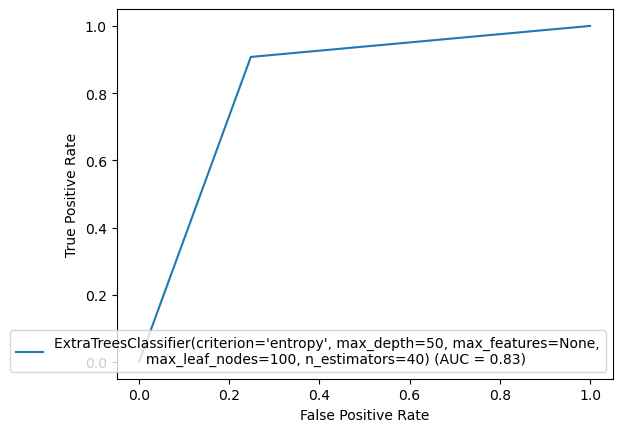

In [231]:
# ExtraTree

display_et=metrics.RocCurveDisplay(fpr = fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=Final_model_et)
display_et.plot()

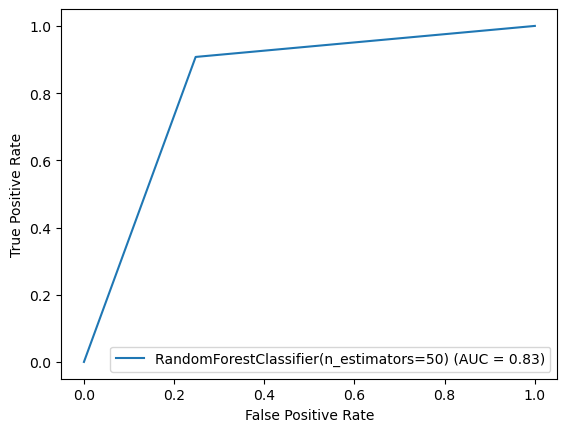

In [230]:
# Random Forest

display_rf=metrics.RocCurveDisplay(fpr = fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=Final_model_rf)
display_rf.plot()

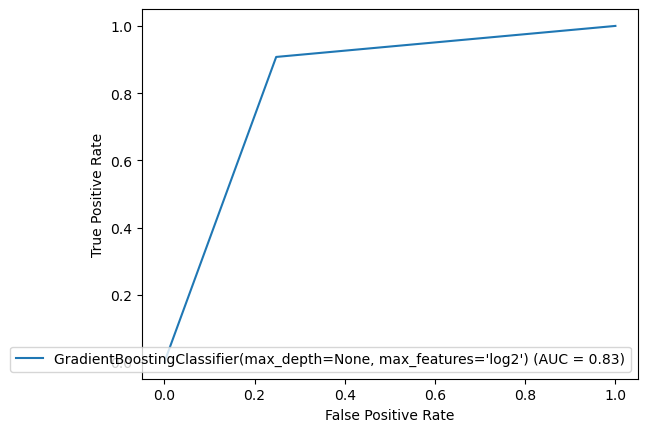

In [229]:
# Gradient Boosting

display_gb=metrics.RocCurveDisplay(fpr = fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=Final_model_gb)
display_gb.plot()

# Saving the model

In [233]:
import joblib

import joblib

joblib.dump(et, 'Loan-Application-Status.pkl.obj')

['Loan-Application-Status.pkl.obj']